# Symbolic Regression, for *your* data.

## Introduction

#### Use the Geppy GEP-RNC algorithm to produce an explainable AI model for your dataset.

This notbook makes applying geppy to *your* training dataset easy.

It is set out as a guided template - just configure your requriements and data, and hit run.
I have created it like a tutorial and training guide. If you have experience, just delete all my rambling, or in jupyter-labs click on the cell buttons to hide the text.

I strongly suggest you copy this notebook to a new project-specific file name, and modify as you wish.

#### Why this notebook?

Since publishing my first example of symbolic regression using Geppy a few years ago, several people have since written in to ask for help with their projects.

While it's fun to be helpful, I realised there is no easy guided tour that makes GEP __accessible__ to researchers in other fields who want to try out symbolic regression as a technique, but whom don't necessarily know python or have the time to become experts/programmers in *deap* or *geppy*. 

So I decided to create one, and enable many people to benefit from explainable AI, making this great software more accesible.

Using this template with your own tabular dataset, my hope is that you will be able to evolve a symbolic regression model for your own use case. It will be created using __*Gene Expression Programming*__ as the mechanism for generating your models, providing you well documented methodology to explain how you generated your results. Perhaps more importantly, the method is also interesting and engaging, and hopefully this will capture your users' imaginations too.

https://en.wikipedia.org/wiki/Gene_expression_programming

## Learn More

Places to get familiar with GEP and *geppy* are here:

+ [Introduction to gene expression programming](https://geppy.readthedocs.io/en/latest/intro_GEP.html)
+ [Overview of geppy for Gene Expression Programming (GEP)](https://geppy.readthedocs.io/en/latest/overview.html)

To check the detailed documentation of each function/class in *geppy*, please refer to the [library reference](https://geppy.readthedocs.io/en/latest/#library-reference).

If you learn by reading books, I highly recommend reading the best book on the topic:


https://www.amazon.co.uk/Gene-Expression-Programming-Mathematical-Computational/dp/3540327967

#### How to use this template

This template will guide you through the following table of contents, with step by step instructions and helper functions to accelerate taking you through the various stages needed to deliver a genetic algorithm based ML project.

Start at the top, and work your way down in sequence through the cells, running them and checking they work as you go.
At the end the ML will launch and you will be able to review the results.

<span style="color:red">The places to add your own configuration are highlighted in red!</span>

As with all things - there is much you will learn going through the process yourself. I've included notes and links to materials you can read through to use this as a learning tutorial, as well as an accelerator.

I suggest you first set up an environment, fork this notebook, and from there you can add your data and dictionary and tailor your experiment to your needs.


#### Experimental Design

Every good science experiement has a method and structure that is clear and easily communicated. This template does too!

##### Table of Contents:
    
    ## Introduction
    #### Learn More
    #### How to use this template
    #### Experiment Outline
    
    # 0. Tools & Dependencies
    #### Imports
    #### Troublshooting installation help
    #### Seeds and Reproduceability
    
    # 1. Data
    ### 1.1 Prepare your input data
    ### 1.2 Load your data
    #### 1.2.1 Check symbols mapping
    ### 1.3 Exploratory Analysis
    ### 1.4 Prepare your data for ML
    #### Choose percent split for Test/Train
    #### Split into Test/Train
    #### Build Any Additional Features Needed
    #### Final Checks
    
    # 2. Design
    ### 2.1 Configure Evolution Inputs
    #### 2.1.1 Terminal Registration
    #### 2.1.2 Function Registration
    ### 2.2 Configure Evolution
    #### 2.2.1 Evolutionary Pressures
    #### 2.2.2 Gene Complexity
    #### 2.2.2.1 Choose Head, Number of Genes, Linking Function
    #### 2.2.3 Define the fitness evaluation function
    #### 2.2.4 Register genetic operators
    #### 2.2.5 Define Statistics to collect
    #### 2.2.3 Multiprocessing / Islands / Demes (NOT YET IMPLEMENTED)

    # 3. Run!
    #### 3.1 Launch Evolution

    # 4. Evaluate the Found Solution
    ### 4.1 Inspect
    #### 4.1.1 Simplify the best model
    #### 4.1.2 Formal presentation
    #### 4.1.3 Visualise the winning genetic structure

    
    ### 4.2 Measure Performance
    #### 4.2.1 Convert the Model into an Executable Function
    #### 4.2.2 Apply the model to Holdout data
    #### 4.2.3 Calculate MSE and R2 for holdout
    #### 4.2.4 Quick study of the holdout errors
    ### 4.3 Visualisation of Model Performance
    #### 4.3.1. Plot actual vs prediction
    #### 4.3.1. Plot actual vs prediction, zoom in
    
    # 5. Deployment
    ### 5.1 Business Value Assessment
    
    # 6. Credits & License


# 0. Tools and Dependencies

#### Imports

In [1]:
import geppy as gep
from deap import creator, base, tools
import numpy as np
import random
import numexpr
import pandas as pd

import operator 
import math
import datetime
import graphviz
import os
from numba import jit
from sympy import *

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

#### Help: Troublshooting Installation 

In [2]:
# troubleshooting note 1:

# recently setuptools depreciated some things that deap relied on to convert python27 code to python3 code
# my recent fresh install gave me alot of headaches installing deap. The solution that worked for me was:

# pip install setuptools==58
# pip install deap

# note that you may be using a virtual environment setup, so doublecheck how to install for your environment

In [3]:
# troubleshooting note 2:

# If you are missing some things, it's not just python that needs setting up.
# There may be some actual server side installs to do,
# for example, graphviz may not be installed on your machine. For mac:

# brew install graphviz

# will install it on your system. pip install graphviz, installs the api to this executable.
# For python things, you can install them from right in your notebook if needed, using this syntax:

# !pip install geppy

# If you are new to jupyter and virtual environments, this is useful: https://stackoverflow.com/questions/42449814/running-jupyter-notebook-in-a-virtualenv-installed-sklearn-module-not-available


### Reproducibility

#### Repoducible Random Numbers

It's important to be able to reproduce experimental results, so set a random seed below, to activate it.

This will carry the seed into numpy too. when you rerun the notebook, you should get exactly the same results from the evolutionary run if you are not sure what this is all about, read this: https://en.wikipedia.org/wiki/Random_seed

##### <span style="color:red">Configure your seed below:</span>

In [4]:
# pick your seed, set it to s. It will force python to use it, as well as numpy.
yourseed = 10
random.seed(yourseed)
np.random.seed(yourseed)

# set s to be the seed you want, and it will configure the whole notebook.

In [5]:
# Collect all the parameters, to save details of the experiment, held in this dictionary
experiment = {}
experiment['date']= datetime.datetime.now().strftime('%Y/%m/%d')
experiment['seed']= str(yourseed)

#### Declaring Installed libraries

Every now and again I hear people need to also declare the software stack they use for reproducibility reporting. In cloud environments this can be hard sometimes. If needed you can report on python packages and versions you have installed in this notebook, so you can truly recreate the experiment just as it's run here.

In [6]:
# This will list software is used within your notebook. 
# It's Handy in cloud notebook environemnts given to you.

# uncomment to run, it will list every package available to your notebook ... which could be a long list!
#!pip freeze

##### Defaults you can override later. (Don't edit here)

In [7]:
# some defaults to drive the rest of the notebook are below. 

# DO NOT EDIT HERE - Edit cell 21

normalisation = 0
# DO NOT EDIT HERE
TryFeaturesOnly = 0 
# DO NOT EDIT HERE
TryKmeansFeatures = 0
# DO NOT EDIT HERE,
n_clust = 1

# 1. Data

When collecting data is expensive, and you have less than a thousand observations - symbolic regression comes to the rescue. You don't need gigabytes of training data to get a meaningful result like you might with deep learning approaches for example.

This notebook assumes that you are starting out with a simple tabular file, like a csv file, that holds your observations.

Symbolic regression is a mechanism for doing machine learning that is suitable for "SmallData". Scientific "SmallData" is usually is collected in experients that might be expensive, so the amount of data generated is small. You can test this ability to deliver reasonable models on small data, by reducing your training/holdout split to be 5% of input data, and inspect the impact on MSE. If there is a clear truth function, it will probably still be found.

## 1.1 Prepare your input data

When you obtain your dataset, you'll discover that it's typically not got column headers, or variable names that are good for symbolic regression. So I highly suggest that you do the following.

Create a new dataset with better column names, and then create a data dictionary, to document what you did.
I've actually built this notebook to REQUIRE you to do this step, so you are forced to follow best practice. 

Below is an example of a regression dataset posted on github, which has names we need to remap, and how to construct the data dictionary.

#### Build a dataset

Create a tabular dataset for your observations that has named columns. 

For many this means a spreadsheet - if so save it as a csv file. For others this means directly creating a delimited file, like a csv or tsv file, from instrumentation. If you have nested json data, create your own preprocess to flatten it to simple tabular data. I can't guess what you are starting with - but your target is to create a flat delimted file. These work best.

When creating data, give these columns __unique__, meaningful, and __very short names__ (it helps a lot with readability) that do not have any punctuation or special characters in them (definately no whitespace please!). When we present a final symbolic regression equation that we find to solve your problem, this will keep our equation symbols concise and readable.

Within the data file, I highly recommend that you have a single column containing the learning target, the thing you want to predict. 

Call the learning target value something short everyone will understand. I you have no good name, I suggest that __Y__ is a standard name for the observed target value you collect along with your observations. Later when we build a model to guess __Y__ for new observations, __Yp__ will be used, and it means the "predicted value of Y". If you have a particular variable name you'd like to guess, keep it short and meaningful. Example "Concrete compressive strength(MPa, megapascals)" becomes CCS. Predictions are CCSp.

__IMPORTANT__ Put your target data in the last and final column (meaning that column "furthest to the right") in your datafile. This placement is generally just good practice. In this notebook, however, is dynamically configured from a data dictionary - so this is not mandatory.

#### IMPORTANT, you **must** provide a data dictionary to use this notebook.

This notebook will read those column headers, to assign them to symbols in the final output equations. Like with any decent physics text book, you will need to declare what each symbol means. It sounds obvious, but create a data dictionary (often called a file layout, that names each symbol in your file, and sets out a human readable description. 

#### Example Data Dictionary

In [8]:
# Edit or recreate a dictionary file, using the template I provided.
# Be sure that your dictionary lists columns in field order.
# keep the column headers in the dictionary the same
# Type field must have values "Input" or "Target", capitalisation is important.
# number your fields properly.

exampleDictionary = pd.read_csv('../../data/UCI_PowerPlant_dictionary.csv')
exampleDictionary.head(10)

# don't forget to give your csv file, the headers you see below!

,Field,Symbol,Type,Description
0,1,AT,Input,Atmospheric Temperature(Celius)
1,2,V,Input,Exhaust Vacuum (cm Hg)
2,3,AP,Input,Ambient Pressure (milibar)
3,4,RH,Input,Relative Humidity (%)
4,5,PE,Target,Plant Output Energy (MegaWatt)


#### Example Dataset, Organised for Geppy

In [9]:
# read in the data to pandas
exampleData = pd.read_csv('../../data/UCI_PowerPlant.csv')
exampleData.tail(10)

,AT,V,AP,RH,PE
9558,20.18,43.56,1013.14,39.16,462.80
9559,18.51,50.90,1012.95,82.71,459.11
9560,13.60,39.82,1013.34,86.10,470.69
9561,33.42,68.51,1011.91,45.83,427.66
9562,13.79,42.07,1018.27,88.06,462.25
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93
9567,23.68,51.30,1011.86,71.24,451.67


##  1.2 Load your data

Put your data into the load directory for this notebook, so that it is easily found.
There is a subdirectory to hold it called "data" under the main geppy installation directory.
"//your/path/geppy/data/"

If you launched this notebook from "//your/path/geppy/examples/sr" then the data directory will be found relative to that one in "../../data/"

With that in mind, the first job is to check you have the right files:

#### <span style="color:red">Name your input directory:</span>

In [10]:
# CONFIGURE HERE!

# enter the name your subdirectory for input data. Here I call it "data" but you can call it what ever you want.
yourDataFolder = '../../data'
yourDataDir = yourDataFolder + "/"

#### doublecheck the data is there

In [11]:
# doublecheck the data is there
datafile = os.getcwd()+ "/" + yourDataDir
experiment['absolute data path']=str(os.getcwd()+ "/" + yourDataDir)
experiment['relative path']=str(yourDataDir)
print("Your data directory is:\n\n\t", datafile, "\n")
print("The files found there are:")
pd.DataFrame({os.getcwd()+"/" + yourDataDir:os.listdir("./" + yourDataDir)}).head(100).sort_values(by=os.getcwd()+"/" + yourDataDir,axis=0)

Your data directory is:

	 /Users/andrew.morgan/dev/clone/geppy/examples/sr/../../data/ 

The files found there are:


,/Users/andrew.morgan/dev/clone/geppy/examples/sr/../../data/
6,UCI_PowerPlant.csv
5,UCI_PowerPlant_dictionary.csv
0,airfoil_self_noise.csv
2,airfoil_self_noise_dictionary.csv
1,concrete-dataset.csv
4,concrete-dataset_dictionary.csv
3,readme.md


#### <span style="color:red">Load and Inspect your data dictionary: </span>

In [12]:
# CONFIGURE HERE
yourDictionary = pd.read_csv(yourDataDir + 'UCI_PowerPlant_dictionary.csv')
yourDictionary.head(10)

,Field,Symbol,Type,Description
0,1,AT,Input,Atmospheric Temperature(Celius)
1,2,V,Input,Exhaust Vacuum (cm Hg)
2,3,AP,Input,Ambient Pressure (milibar)
3,4,RH,Input,Relative Humidity (%)
4,5,PE,Target,Plant Output Energy (MegaWatt)


**(YOU MUST PROVIDE A DATA DICTIONARY FILE)**

#### <span style="color:red">Load your data file to pandas: </span>

In [13]:
# CONFIGURE HERE
# read in the data to pandas
# have a quick inspect it looks good:
datafile = str(yourDataDir + 'UCI_PowerPlant.csv')
yourData = pd.read_csv(datafile)
yourData.head(100)

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
95,26.63,64.44,1012.66,61.19,442.00
96,18.87,52.08,1005.25,99.19,449.61
97,5.12,40.78,1025.45,96.88,481.28
98,31.10,71.32,1008.09,45.87,437.54


### 1.2.1 Check symbols mapping

##### Make sure we are all good with our symbols and dictionaries, cache the lists:

In [14]:
# Autoconfigure names of your data inputs, your "symbols" for symbolic regression.
yourSymbols = yourData.columns.tolist()
colDesc = yourDictionary.sort_values(by=['Field'])['Description'].to_list()
print(yourSymbols)

['AT', 'V', 'AP', 'RH', 'PE']


##### Descriptive metrics, for human readers

In [15]:
# yourDictionary.sort_values(by=['Field'])['Description'].tolist()
# notice, you can swap out your short symbols for the long descriptions. Data Dictionaries work.
yourData.columns = colDesc
yourData.describe()

,Atmospheric Temperature(Celius),Exhaust Vacuum (cm Hg),Ambient Pressure (milibar),Relative Humidity (%),Plant Output Energy (MegaWatt)
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


##### Descriptive metrics, reported by symbol:

In [16]:
# here's the same data we'll work with, mapped back to yours symbols
yourData.columns = yourSymbols
yourData.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


Review the descriptive statistics tables above. Check you are happy you have mapped your data to symbols properly.

## 1.3 Exploratory Data Analysis


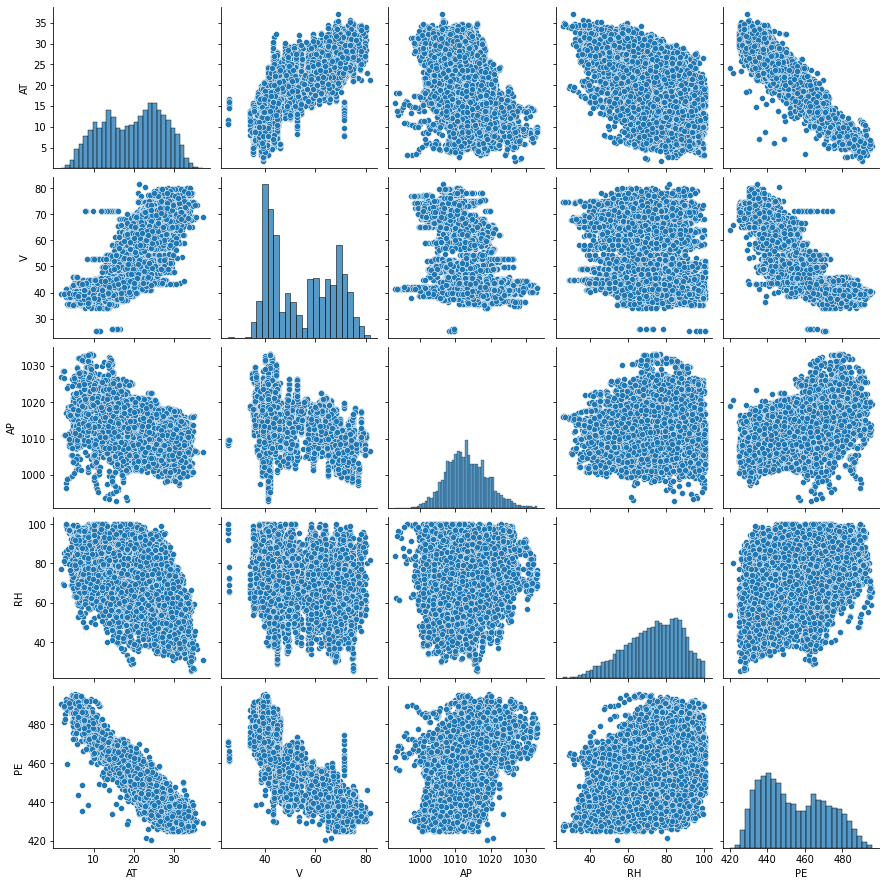

In [17]:
%matplotlib inline
# no EDA is complete without one of these
sns.pairplot(data = yourData, vars=yourSymbols)
plt.show()

##  1.4 Prepare your data for ML

#### 1.4.1 <span style="color:red">Chose your test/train split</span>

In [18]:
# CONFIGURE the amount of data for training, the remainder is for testing
split = 0.5
experiment['test/holdout split']=str(split)
# 0.7 means 70% is used for training, 30% for holdout testing

In [19]:
msk = np.random.rand(len(yourData)) < split

#### Create separate test and train datasets

In [20]:
train = yourData[msk]

In [21]:
holdout = yourData[~msk]

#### 1.4.2 Build any additional features

Notes on Features:

The question of whether normalising data might help symbolic regression to construct models came up. My first thought was maybe no.

But then it occured to me Geppy has no concept of any value outside of the immediate observation to reason with, and if it had an understanding of things at the training dataset level, like the average of a value, or its standard deviation, it might evolve things like a z-score (xbar - obs/stdev) as part of the search algorithm, and this would be a possibility it could use or ignore. At worst, the values would simply be rich random numeric constants, to add to those we already are searching. So it can't harm the process, but could benefit the process.

To test this, we can construct these additional features now, to provide the data to geppy.
These next cells show you how:

## <span style="color:red">EDIT HERE: If you want to try normalisation/experimental features:</span>

In [22]:
# CONFIGURE HERE: override the 0 default the value to 1, to create average, stdev and zscore based features.
# if you wish to exclude raw data, and ONLY pass along z-scores, set this TryOnlyFeatures to one.
# if you want to try adding kmeans clusters as features, set that here.

    # set to 1, to test using ZScores as inputs along with the raw values
normalisation = 0
    # set to 1, to test including onehot kmeans cluster ids as features to include
TryKmeansFeatures = 0
    # set to 1, to test using features zscores/means/std dev and/or kmeans as the **only** inputs, discarding raw values
TryFeaturesOnly = 0


# edit these HERE

In [23]:
# log our settings for later review, don't edit

if normalisation == 1:
    experiment['normalisation']=str('True')
else: 
    experiment['normalisation']=str('False')
if TryKmeansFeatures == 1:
    experiment['TryKmeansFeatures']=str('True')
else: 
    experiment['TryKmeansFeatures']=str('False')
if TryFeaturesOnly == 1:
    experiment['TryFeaturesOnly']=str('True')
else: 
    experiment['TryFeaturesOnly']=str('False')

#### 1.4.2.1 Build the features

In [24]:
# below I apply features. If you're not sure what it does, don't edit. Oringal data items are:

yourDictionary.loc[(yourDictionary['Type'] == 'Input')].sort_values(by=['Field'])['Symbol'].to_list()
experiment['Original Data Inputs']=yourDictionary.loc[(yourDictionary['Type'] == 'Input')].sort_values(by=['Field'])['Symbol'].to_list()


In [25]:
# no need to edit these - they automate the boilerplate work for you
def addDataFeature(trainframe, holdoutframe, terminals):
    trainf = pd.DataFrame(trainframe)
    holdoutf = pd.DataFrame(holdoutframe)
    yourDict = pd.DataFrame(yourDictionary)
    
    onlyinputs = yourDict.loc[(yourDict['Type'] == 'Input')].sort_values(by=['Field'])['Symbol'].to_list()
    terminals = []
    featuresOnly = []
    #print(yourDict)
    
    for name in onlyinputs:
        # train
        # create functions and apply them to train data
        # mean
        print(name)
        genfeatures = 'avg' + name + ' = ' + name + '.mean()'
        trainf.eval(genfeatures, inplace = True)
        avgval = trainf['avg' + name].max()
        terminals.append(name)
        terminals.append('avg' + name)
        
        # std
        genfeatures = 'std' + name + ' = ' + name + '.std()'
        trainf.eval(genfeatures, inplace = True)
        stdval = trainf['std' + name].max()
        terminals.append('std' + name)
        
        # zscores
        genfeatures = 'z' + name + ' = (' + name + '- avg' + name +')/' + 'std' + name
        trainf.eval(genfeatures, inplace = True) 
        terminals.append('z' + name)
        #     Here we isolate just the z-scores and cache just those terminal names
        featuresOnly.append('z' + name)
        
        # holdout - apply features to holdout - based on avg,std of seen training data (no bleed of past into future)
        # avg
        avgVal = str(trainf['avg' + name].max())
        genfeatures = 'avg' + name + ' = ' + avgVal
        holdoutf.eval(genfeatures, inplace = True)
        # std
        stdVal = str(trainf['std' + name].max())
        genfeaturesD = 'std' + name + ' = ' + stdVal
        holdoutf.eval(genfeaturesD, inplace = True)   
        # zscores
        genfeatures = 'z' + name + ' = (' + name + '- avg' + name +')/' + 'std' + name
        
        holdoutf.eval(genfeatures, inplace = True) 

    return trainf, holdoutf, terminals, featuresOnly


In [26]:
# default the final terminals to the core dataset
finalTerminals = yourDictionary.loc[(yourDictionary['Type'] == 'Input')].sort_values(by=['Field'])['Symbol'].to_list()
finalTerminals

['AT', 'V', 'AP', 'RH']

In [27]:
finalTarget = yourDictionary.loc[(yourDictionary['Type'] == 'Target')].sort_values(by=['Field'])['Symbol'].to_list()
finalTarget

['PE']

In [28]:
# if you normalise, update the data frames, and the final terminals list
if normalisation == 1:
    train, holdout, finalTerminals, ZscoreTerminals = addDataFeature(train, holdout, yourDictionary)

In [29]:
# now we have constructed out data features, we have a new set of final symbols held in our list
#print(finalTerminals)

In [30]:
# inspect if you want to double check things:
#train.info()
#holdout.info()

In [31]:
train.tail()

,AT,V,AP,RH,PE
9561,33.42,68.51,1011.91,45.83,427.66
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9566,17.65,59.87,1018.58,94.65,450.93
9567,23.68,51.30,1011.86,71.24,451.67


In [32]:
holdout.tail()

,AT,V,AP,RH,PE
9556,7.72,41.14,1025.11,96.75,478.34
9557,27.06,43.77,1011.02,42.61,442.15
9559,18.51,50.90,1012.95,82.71,459.11
9562,13.79,42.07,1018.27,88.06,462.25
9565,15.99,43.34,1014.20,78.66,465.96


#### Final Checks

In [33]:
# check the holdout dataset
holdout.describe()

,AT,V,AP,RH,PE
count,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000
mean,19.605385,54.223277,1013.327130,73.501730,454.394099
std,7.401603,12.693844,5.950704,14.505657,16.987791
min,2.800000,25.360000,993.110000,26.300000,421.570000
25%,13.520000,41.660000,1009.100000,63.540000,439.775000
50%,20.260000,51.950000,1013.040000,75.230000,451.750000
75%,25.690000,66.490000,1017.280000,84.840000,468.745000
max,37.110000,81.560000,1033.250000,100.160000,495.230000


In [34]:
# check the training data
train.describe()

,AT,V,AP,RH,PE
count,4881.000000,4881.000000,4881.000000,4881.000000,4881.000000
mean,19.695255,54.385050,1013.193731,73.123886,454.337076
std,7.501491,12.722165,5.927189,14.689652,17.144400
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.760000,1009.100000,63.000000,439.740000
50%,20.470000,52.720000,1012.870000,74.670000,451.420000
75%,25.760000,66.560000,1017.240000,84.820000,468.150000
max,35.200000,80.250000,1033.300000,100.140000,495.760000


## 1.5 Experimental Features

#### 1.5.1 KMEANS clustering,  potentially enabling "piecewise" symbolic regressions

In this section I will test using kmeans clustering features in a symbolic regression experiment, using these steps:

1. First train an unsupervised k-means model on the training data.
2. Apply the model to training data, to get cluster ids.
3. Onehot encode the cluster ids and feed these as terminals into the symbolic regression, along with other training data.
4. Apply kmeans model to holdout data, and one hot encode them too.
5. Build a symbolic regression using our data plus the onehot encoded cluster inputs.
6. Question: does the symbolic regression construct peicewise regression functionality? In other words, does it multiply by a onehot encoded field to turn on/off some of its calculations depending on the cluster a datapoint falls in?

The reason I want to run this experiment:

Any gene we are evolving could potentially select a one hot encoded value and multiply it with a sub expression in our abstract syntax tree, offering an ability to effectively turn on/off that sub-expression - depending on the cluster id of the datapoint being examined. The test is to see if we can hack evolution to evolve peicewise regression functions!

Rather than force peicewise regressions explicitly, my idea is to simply offer this information to the evolution process, and let evolution decide on what's best...

__NOTE 1:__ anything multiplied by a clusterID generates a peicewise conditional value. Anything divided by a clusterID does too, as we're using a *protected divide* which returns 1 as a result if there is a division by 0. (learning: after experimenting with this approach, I fed geppy several protected divide alternates, and it seems to be a good approach, as these divide equations are used frequently.)
__NOTE 2:__ based on my observations, I added in min/max functions, thinking several clusters might be lumped together, but it turns out these are useful more broadly and again are frequently in winning individuals.

__Note 2: about Categorical Features__: if you have categorical features, you can use these next sections as an example for how to onehot encode your inputs and pass the terminals for the columns to the symbolic regression. 

In [35]:
# set the number of clusters you'd like to try here
# this will ensure there is one+this number of genes in the evolution

n_clust = 10

if TryKmeansFeatures ==1:
    from sklearn.cluster import KMeans
    km = KMeans(n_clusters=n_clust, random_state=yourseed, max_iter=500)
    km.fit(train[finalTerminals])

In [36]:
if TryKmeansFeatures ==1:
    train['KMeans_ID'] = pd.Series(km.predict(train[finalTerminals]), index=train.index)

In [37]:
# A note on portability
#
# The above kmeans model may need to be exported and reimported into your production env
# so that you can productionise your data science experiement features, if it is successful.
# the way to do that is using PMML models exported from pipelines. further reading to help
# you to get started below:
#
# #https://www.phdata.io/blog/ml-on-snowflake-clustering-data-with-snowpark/
# from sklearn.pipeline import Pipeline
# from nyoka import skl_to_pmml
# from sklearn.model_selection import train_test_split
#
# pipe = Pipeline([('model', KMeans(n_clusters=8, random_state=0))])
# pipe.fit(train)
#
# skl_to_pmml(pipeline=km,
#            col_names=predictors,
#            pmml_f_name="kmean_model.pmml")

In [38]:
train.head()

,AT,V,AP,RH,PE
1,23.64,58.49,1011.40,74.20,445.75
4,11.80,40.66,1017.13,97.20,464.43
5,13.97,39.16,1016.05,84.60,470.96
6,22.10,71.29,1008.20,75.38,442.35
8,31.25,69.51,1010.25,36.83,428.77


In [39]:
if TryKmeansFeatures ==1:
    %matplotlib inline
    # no EDA is complete without one of these
    sns.pairplot(data = train, vars=yourSymbols, hue="KMeans_ID" )
    plt.show()

In [40]:
if TryKmeansFeatures ==1:
    onehot = pd.get_dummies(train.KMeans_ID, prefix='cluster')

In [41]:
if TryKmeansFeatures ==1:
    train = pd.concat([onehot, train], axis=1)
    #train = train.drop(columns=['KMeans_ID'])
    # experimental:
    # rather than drop this column, I'll just leave it in the data
    # so later I can experiment if I can use it to generate a linker that is a piecewise function 
    # so that each cluster gets it's own "gene" and hence own regression equation...
    # 

In [42]:
if TryKmeansFeatures ==1:
    train.head()

In [43]:
if TryKmeansFeatures ==1:
    # now prepare the holdout data using the kmeans model
    holdout['KMeans_ID'] = pd.Series(km.predict(holdout[finalTerminals]), index=holdout.index)
    holdout_onehot = pd.get_dummies(holdout.KMeans_ID, prefix='cluster')
    holdout = pd.concat([holdout_onehot, holdout], axis=1)
    #holdout = holdout.drop(columns=['KMeans_ID'])
    holdout.tail()

In [44]:
if TryKmeansFeatures ==1:
    # lastly - add our new one hot encoded features to our list of terminals used by geppy
    finalTerminals =  onehot.columns.tolist() + finalTerminals
    # finalTerminals =  onehot.columns.tolist() + finalTerminals + ['KMeans_ID']
finalTerminals

['AT', 'V', 'AP', 'RH']

In [45]:
# if the TryFeaturesOnly switch is on, we can add in these clusters to it
if TryFeaturesOnly == 1 and TryKmeansFeatures ==1:
    ZscoreTerminals = ZscoreTerminals + onehot.columns.tolist()
    experiment['derived features']=ZscoreTerminals

# 2. Design

### 2.2 Configure Evolution Inputs

#### Introduction

The first step in GEP (or GP as well) is to specify the primitive set, which contains the elementary building blocks to formulate the model. For this problem, we have:
+ function set: the standard arithmetic operators addition (+), subtraction (-), multiplication (*), and division (/).
+ terminal set: the mapping of our data columns to variables "terminals", plus we include random numerical constants (RNC).

NOTE:

- We must define a *protected division* to avoid dividing by zero.
- We can create any function that won't produce NAN, ever
- Even there may be multiple RNCs in the model, we only need to call `PrimitiveSet.add_rnc` once.
- If we created features in the data, we can add them to our dataset directly, for mapping to terminals
- Alternatively, we can also define Constants as a terminal in geppy. Pi could be an example. Note that Outside of geppy evolution, other programs will need access to these values too to use then to calculate.

#### 2.2.1 Terminal Registration

In [46]:
# if you Only wish to work with the normalised z-score outputs set this flag
# then go back to cell_21 and set:  TryFeaturesOnly = 1

In [47]:
# build the final list of data to feed in, the symbols become "terminals"

# notice we push in finalTerminals which could include features too
# we set them for use in geppy by assigning these symbol names using pset

if TryFeaturesOnly == 1 and normalisation == 1:
    pset = gep.PrimitiveSet('Main', input_names=ZscoreTerminals)
    # doublecheck:
    print('setting: ', ZscoreTerminals, ' as the *Only* symbols to reason over in our final equation')
    experiment['final terminal inputs']=ZscoreTerminals
else:
    pset = gep.PrimitiveSet('Main', input_names=finalTerminals)
    # doublecheck:
    print('setting: ', finalTerminals, ' as the *Only* symbols to reason over in our final equation')    
    experiment['final terminal inputs']=finalTerminals

setting:  ['AT', 'V', 'AP', 'RH']  as the *Only* symbols to reason over in our final equation


In [48]:
# Auto create global numpy arrays, to remove hardcoding.

# We must also make our terminals globally accessible, as numpy arrays, until I rebuild the individual evaluation function.
# so I have his terrible hack here that takes each Terminal set, and turns it into a numpy array available globally
# It assigns our symbols as global variables, and to numpy arrays built from our train dataset

print('we will use these in the final regression:')
if TryFeaturesOnly == 1:
    for term in ZscoreTerminals:
        globals()[str(term)] = train[term].values
        print('setting ', term)
else:
    for term in finalTerminals:
        globals()[str(term)] = train[term].values
        print('setting ', term)
        
# while it works, it's not normal best practice.
# Best to stop the kernal and rerun the notebook between data sets!

we will use these in the final regression:
setting  AT
setting  V
setting  AP
setting  RH


In [49]:
# We also need to set out target data from the training set to a global variable, called Y

Y = train[yourDictionary.loc[(yourDictionary['Type'] == 'Target')].sort_values(by=['Field'])['Symbol'].tolist()[0]].values

In [50]:
type(Y)

numpy.ndarray

In [51]:
# while we're at it, lets set a global variable for the holdout known targets Yt
# createa a global reference in python to fetch our holdout target values, named Yt

Yh = holdout[yourDictionary.loc[(yourDictionary['Type'] == 'Target')].sort_values(by=['Field'])['Symbol'].tolist()[0]].values

In [52]:
type(Yh)

numpy.ndarray

#### 2.1.2 Function Registration

In [53]:
# below define any bespoke functions you will reason with in symbol regression

In [54]:
# we need to define our own protected divide, so we never emit 1/0 exceptions
def protected_div_zero(x1, x2):
    # if divisor is 0, return 0
    if abs(x2) < 1e-6:
        return 0
    return x1 / x2

def protected_div_one(x1, x2):
    # if divisor is 0, return 1
    if abs(x2) < 1e-6:
        return 1
    return x1 / x2

def protected_div_orig(x1, x2):
    # if divisor is 0, return 1
    if abs(x2) < 1e-6:
        return x1
    return x1 / x2

In [55]:
# experimental functions, max/min

def max(a, b):
    if a > b:
        return a
    else:
        return b
    return a

def min(a, b):
    if a < b:
        return a
    else:
        return b
    return a

In [56]:
# to figure out if special functions help lets define some:
# this is the sigmoid function used to preprocess data in many ml setups

import math

# These functions work well on data that has been cast into a tight range. 
# if we use them on data having giant ranges, they will produce nan's and other issues.
# so, only Use these functions if we restrict our inputs to the z-scores, which are in a tight range

# sigmoid
def sig(x):
    y = (x**2)**(1/2)
    s= 1/(1 + 2.7182818284**(-y))
    ds = s*(1-s)
    return s

# sigmoid derivative
def dsig(x):
    y = (x**2)**(1/2)
    s= 1/(1 + 2.7182818284**(-y))
    ds = s*(1-s)
    return ds



##### 2.1.2.1 here are some alternative linker functions, which accept any number of genes

In [57]:
# it is possible to define functions like Average, which we might use as a linker function.
# it accepts any number of gene inputs

def avgval(*n):
    sums = 0
    for t in n:
        sums = sums + t
    avg = sums / len(n)
    return avg

In [58]:
# Another linker function is simply to multiply the inputs
# this accepts any "arity", meaning any number of gene inputs

def mulval(*n):
    total = 1
    for t in n:
        total = total * t
    return total

In [59]:
# Another linker function is simply to add all the inputs together
# this accepts any "arity", meaning any number of gene inputs

def addval(*n):
    total = 0
    for t in n:
        total = total + t
    return total

In [60]:
# experimental array-generating linker

# this gathers multiple gene outputs into a numpy array to pass back to evaluation functions
# NOTE: this will require you to write a matching evaluate function which is not included in the notebook.

def gatherval(*n):
    tmp = []
    for t in n:
        tmp = tmp + t
    np.asarray(tmp)
    return [np.asarray(tmp)]

# why?
# I put this together intending to test ridge regression with gene created features (todo)


##### <span style="color:red">If you defined new functions, register them into the pset, below:</span>

In [61]:
pset.add_function(operator.add, 2)
pset.add_function(operator.sub, 2)
pset.add_function(operator.mul, 2)
#pset.add_function(protected_div_zero, 2)
#pset.add_function(protected_div_one, 2)
pset.add_function(protected_div_orig, 2)

# testing a function to highlight ranges of a variable with -1,0,1

# note I can register avgval, etc with fixed arity of 2, to use it insides a gene, in addition to being a linking function.

#pset.add_function(avgval, 2)
#pset.add_function(addval, 5)
#pset.add_function(mulval, 5)

# health warning:
# don't use the following functions on large raw data values. 
# They work best on data with a max range like (-10, 10). If you have new functions that only accept z-score type data
# add them under this if statement, then you can allow users to optionally use these functions, automatically.
if TryFeaturesOnly == 1:
    pset.add_function(dsig, 1)
    pset.add_function(sig, 1)
    pset.add_function(math.tan, 1)        # I tested adding trig functions, but normalised inputs work best
    pset.add_function(math.atan, 1)       # I tested adding trig functions, but normalised inputs work best


# Optional functions here:
#pset.add_function(math.sin, 1)        # I tested adding trig functions
#pset.add_function(math.cos, 1)        # I tested adding trig functions
#pset.add_function(max, 2)        # I tested adding max functions
#pset.add_function(min, 2)        # I tested adding min functions

pset.add_rnc_terminal()


##### <span style="color:red">If you defined/used new functions above, update the function map, below:</span>

In [62]:
# if we start to use custom functions, we need to manually override the default symbol maps
# so we can see our final output properly simplified

# start by defining a custom map like this. See that I added my custom functions, including "avgval", near the bottom.

# note this map is only needed to visualise and simplify the final constructed solution.
# while not strictly necessary, it is very very handy, so I show here how I have mapped in a new function I 
# defined into the map, avgval, which determines the average value of two input parameters
# 
import sympy as sp

CUSTOM_SYMBOLIC_FUNCTION_MAP = {
    operator.and_.__name__: sp.And,
    operator.or_.__name__: sp.Or,
    operator.not_.__name__: sp.Not,
    operator.add.__name__: operator.add,
    operator.sub.__name__: operator.sub,
    operator.mul.__name__: operator.mul,
    operator.neg.__name__: operator.neg,
    operator.pow.__name__: operator.pow,
    operator.abs.__name__: operator.abs,
    operator.floordiv.__name__: operator.floordiv,
    operator.truediv.__name__: operator.truediv,
    'protected_div_zero': operator.truediv,
    'protected_div_one': operator.truediv,
    'protected_div_orig': operator.truediv,
    math.log.__name__: sp.log,
    math.sin.__name__: sp.sin,
    math.cos.__name__: sp.cos,
    math.tan.__name__: sp.tan,
    math.atan.__name__: sp.atan,
    'avgval': avgval,
    'addval': addval,
    'mulval': mulval,
    'sig': sig,
    'dsig': dsig,
    'max': sp.Max,
    'min': sp.Min
}

## 2.2 Configure Evolution

In this section we will configure geppy and the evolutionary process.
These configurations can have big effects on the outcome. The following cells take you through the configuration step by step, and offers good standard defaults and choices. As you learn and explore symbolic regression, and GEP. You can duplicate the notebook and make alterations to these configurations to run many experiments.

### 2.2.1 Evolutionary Pressure

We first need to "create" a concept of an individual, and specify how they are generated, and what their fitness metric for evolution will be. We do this by creating a FitnessMin with a weight of -1. This means we attempt to evolve individuals, such that we minimise this value. If we wanted to maximise a metric, the weight would be 1.
Later we will specify a "evaluator" for individuals, and it will create the numeric values, and calculate them. In our case we default to calculating the MSE.

In [63]:
# set up our fitness objectives
creator.create("FitnessMin", base.Fitness, weights=(-1,))                # -1 to minimize the objective (fitness)
creator.create("Individual", gep.Chromosome, fitness=creator.FitnessMin) # create, with FitnessMin configured.


## 2.2.2 Gene Complexity

Register the individual and population creation operations
In DEAP, it is recommended to register the operations used in evolution into a *toolbox* to make full use of DEAP functionality. The configuration of individuals in this problem is:
+ head length: 6
+ number of genes in each chromosome: 2
+ RNC array length: 8

Generally, more complicated problems require a larger head length and longer chromosomes formed with more genes. **The most important is that we should use the `GeneDc` class for genes to make use of the GEP-RNC algorithm.**

#### Your Core Settings Defined Here

Below are parameters that design how your problem is solved genetically. In GEP all genes have a biologically inspired gene and chromosome design that can evolve, and then be expressed into an abstract syntax tree AST, used to create executable code. The complexity of a single gene is controlled by the HEAD, which defines how large an AST could be, and a linker function pulls these small ASTs into a larger one representing the final solution. There is a parameter that allows us to draw on a collection of Random Numerical Constants which includes an array of random numbers.

Guidance.

A bigger head, means bigger solution ASTs, and also larger search space across more complex final solution equations. Increasing this will increase the complexity, and reduce the explainability of the model.

#### 2.2.2.1 <span style="color:red"> Edit your gene setup:</span>

## <span style="color:red"> --- Choose Head, Number of Genes, Linking Function --- </span>

In [64]:
# this is the main configuration of the genes you'll want to play with.

h = 14                            # head length, drives complexity
                                  
if n_clust > 2:                   # number of genes in a chromosome, we will average/mul/add across them in the linker
    n_genes = n_clust * 2      
else:
    n_genes = 2

n_genes = 2                       # you can override and hard code the number of genes if you wish here 

r = 10                            # length of the RNC array
enable_ls = True                  # whether to apply the linear scaling technique

# now log our choices 
experiment['number of genes']= str(n_genes)
experiment['length of rnc array']= str(r)
experiment['use linear scaling']= str(enable_ls)


**NOTE** Above you define the gene structure which sets out the maximum complexity of the symbolic regression

In [65]:
# Here we configure geppy population and chromosome

toolbox = gep.Toolbox()
toolbox.register('rnc_gen', random.randint, a=-10, b=10)   # each RNC is random integer within [-5, 5]
toolbox.register('gene_gen', gep.GeneDc, pset=pset, head_length=h, rnc_gen=toolbox.rnc_gen, rnc_array_length=r)


#### 2.2.2.1  <span style="color:red"> Your __LINKER__ functions are configured here</span> 

In [66]:
# This will configure how many genes are linked.

# LINKER functions defined here
# options are avgval, mulval, addval
# uncomment the option you wish to use

# options are 'addval', avgval', 'mulval', 'gatherval'
mylinker = avgval

if n_genes > 1:
    toolbox.register('individual', creator.Individual, gene_gen=toolbox.gene_gen, n_genes=n_genes, linker=mylinker)
else:
    toolbox.register('individual', creator.Individual, gene_gen=toolbox.gene_gen, n_genes=n_genes)

# log choice:
experiment['linker function']= str(mylinker.__name__)

In [67]:
# compile utility: which translates an individual into an executable function (Lambda)
toolbox.register('compile', gep.compile_, pset=pset)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

### 2.2.3 Define the fitness evaluation function
In DEAP, the single objective optimization problem is just a special case of more general multiobjective ones. Since *geppy* is built on top of DEAP, it conforms to this convention. **Even if the fitness only contains one measure, keep in mind that DEAP stores it as an iterable.** 

Knowing that, you can understand why the evaluation function must return a tuple value (even if it is a 1-tuple). That's also why we set ``weights=(-1,)`` when creating the ``FitnessMax`` class.

In [68]:
if TryFeaturesOnly == 0:
    type(finalTerminals)
    param_string = ", ".join(finalTerminals)
    print('the params below are args to the lambda function we evolve in geppy, set dynamically \n\n')
    print(param_string)
else:
    type(ZscoreTerminals)
    param_string = ", ".join(ZscoreTerminals)
    print('the params below are args to the lambda function we evolve in geppy, set dynamically \n\n')
    print(param_string)    

the params below are args to the lambda function we evolve in geppy, set dynamically 


AT, V, AP, RH


In [69]:
def evaluate(individual):
    
    """Evalute the fitness of an individual: MAE (mean absolute error)"""
    func = toolbox.compile(individual)
     
    # below call the individual as a function over the inputs
    # if we restrict to Only the Zscore features, we need to swap this
    if TryFeaturesOnly == 1:
        param_string = ", ".join(ZscoreTerminals)
    else:
        param_string = ", ".join(finalTerminals)
    
    # here we create the function to evaluate, as a dynamic string we later evaluate
    funcstring = 'np.array(list(map(func, ' + param_string + ')))'
    
    Yp = eval(funcstring)
    
    if np.isinf(Yp).any():
        bigerr = 100000000.199837773
        error = bigerr.astype(np.float64)
    else:    
        error = np.mean((Y - individual.b) ** 2)

    # return the MSE as we are evaluating on it anyway - then the stats are more fun to watch...
    return error,

#### [optional] Enable the linear scaling technique. 

It is hard for GP to determine real constants, which are important in regression problems. Thus, we can (implicitly) ask GP to evolve the shape (form) of the model and we help GP to determine constans by applying the simple least squares method (LSM).

In [70]:

def evaluate_ls(individual):
    """
    First apply linear scaling (ls) to the individual 
    and then evaluate its fitness: MSE (mean squared error)
    """
    func = toolbox.compile(individual)

    # below call the individual as a function over the inputs
    # if we restrict to Only the Zscore features, we need to swap this
    if TryFeaturesOnly == 1:
        param_string = ", ".join(ZscoreTerminals)
    else:
        param_string = ", ".join(finalTerminals)
        
        
    # here we create the function to evaluate, as a dynamic string we later evaluate
    funcstring = 'np.array(list(map(func, ' + param_string + ')))'
    
    Yp = eval(funcstring)
       
    # special cases which cannot be handled by np.linalg.lstsq: (1) individual has only a terminal 
    #  (2) individual returns the same value for all test cases, like 'x - x + 10'. np.linalg.lstsq will fail in such cases.
    # That is, the predicated value for all the examples remains identical, which may happen in the evolution.

    if isinstance(Yp, np.ndarray):
        Q = np.hstack((np.reshape(Yp, (-1, 1)), np.ones((len(Yp), 1))))
        (individual.a, individual.b), residuals, _, _ = np.linalg.lstsq(Q, Y, rcond=None)   
        # residuals is the sum of squared errors
        if residuals.size > 0:
            return residuals[0] / len(Y),   # MSE

    if np.isinf(Yp).any():
        bigerr = 12345678910.12345
        error = bigerr.astype(np.float64)
    else:    
        error = np.mean((Y - individual.b) ** 2)
        
    return error,



In [71]:
# ToDo: Try Ridge Regression

# using 'gatherval' to collect gene outputs, try creating a evaluation function using
# ridge regression, rather than linear regression. It would turn each gene into 
# a feature generator.


In [72]:
if enable_ls:
    toolbox.register('evaluate', evaluate_ls)
else:
    toolbox.register('evaluate', evaluate)

### 2.2.4 Register genetic operators
Compared with GP and other genetic algorithms, GEP has its own set of genetic operators aside from common mutation and crossover. For details, please check the tutorial [Introduction to gene expression programming](https://geppy.readthedocs.io/en/latest/intro_GEP.html).

The following operators are specially designed for GEP in *geppy*. Tournament selection done by DEAP, in later sections.

In [73]:
# unless you know what you are doing, I suggest you don't edit these configurations.
# they control how the genes mutate and evolve

# 1. general operators
toolbox.register('mut_uniform', gep.mutate_uniform, pset=pset, ind_pb=0.05, pb=1)
toolbox.register('mut_invert', gep.invert, pb=0.1)
toolbox.register('mut_is_transpose', gep.is_transpose, pb=0.1)
toolbox.register('mut_ris_transpose', gep.ris_transpose, pb=0.1)
toolbox.register('mut_gene_transpose', gep.gene_transpose, pb=0.1)
toolbox.register('cx_1p', gep.crossover_one_point, pb=0.3)
toolbox.register('cx_2p', gep.crossover_two_point, pb=0.2)
toolbox.register('cx_gene', gep.crossover_gene, pb=0.1)
# 2. Dc-specific operators
toolbox.register('mut_dc', gep.mutate_uniform_dc, ind_pb=0.05, pb=1)
toolbox.register('mut_invert_dc', gep.invert_dc, pb=0.1)
toolbox.register('mut_transpose_dc', gep.transpose_dc, pb=0.1)
# for some uniform mutations, we can also assign the ind_pb a string to indicate our expected number of point mutations in an individual
toolbox.register('mut_rnc_array_dc', gep.mutate_rnc_array_dc, rnc_gen=toolbox.rnc_gen, ind_pb='0.5p')
toolbox.pbs['mut_rnc_array_dc'] = 1  # we can also give the probability via the pbs property



### 2.2.5 Define Statistics to collect
We often need to monitor of progress of an evolutionary program. DEAP offers two classes to handle the boring work of recording statistics. Details are presented in [Computing statistics](http://deap.readthedocs.io/en/master/tutorials/basic/part3.html). In the following, we are intereted in the average/standard deviation/min/max of all the individuals' fitness in each generation.

In [74]:
# I've simplified this to track only the Min MSE which is our primary objective. 
stats = tools.Statistics(key=lambda ind: ind.fitness.values[0])
stats.register("min MSE", np.min)

# 3.0 Run!

## 3.1 Configure and Launch evolution


We make use of *geppy*'s builtin algorithm ``gep_rnc`` here to perform the GEP-RNC evolution. 

A special class from DEAP, `HallOfFame`, is adopted to store the best individuals ever found. Besides, it should be noted that in GEP [*elitism*](https://en.wikipedia.org/wiki/Genetic_algorithm#Elitism) is highly recommended because some genetic operators in GEP are destructive and may destroy the best individual we have evolved.

#### 3.1.1 <span style="color:red">Edit your Population Size setup here:</span>

In [75]:
# a tournament pulls in x individuals, and picks a best. It drives reproduction candidates, and thus evolution.
# We will configure our desired tournament size, then work out the population we need to support it.

tournament = 20

# don't edit this:
toolbox.register('select', tools.selTournament, tournsize=tournament)

# don't edit this:
n_pop = ceiling(tournament*100/7)
num_elites = 1 + floor(tournament*0.2)

#### 3.1.2 <span style="color:red">Edit your Generations, and Hall of Fame here:</span>

In [76]:
# define the number of generations to evolve over here.
n_gen = 50

print("The population size for a tournament of size ",tournament, "is recommended as",n_pop,"\nWe will evole this population for",n_gen,"generations.",num_elites," elites used.")
experiment['tournament size']= str(tournament)
experiment['population size']= str(n_pop)
experiment['number of elites']= str(num_elites)
experiment['number of generations']= str(n_gen)


The population size for a tournament of size  20 is recommended as 286 
We will evole this population for 50 generations. 5  elites used.


In [77]:
# we keep a hall of fame, hof, and this configures how many to hold. adjust as you need.
champs = 3

In [78]:
# set out the final configurations. 
# Don't edit:
pop = toolbox.population(n=n_pop) # 
hof = tools.HallOfFame(champs)   # only record the best three individuals ever found in all generations

In [79]:
startDT = datetime.datetime.now()
print (str(startDT))

2022-07-11 15:15:35.745292


#### 3.2 <span style="color:red">This cell starts the Run. </span>

In [80]:
# start evolution. You can run it several times if you want, to extend the generations if needed.

pop, log = gep.gep_simple(pop, toolbox, n_generations=n_gen, n_elites=num_elites,
                          stats=stats, hall_of_fame=hof, verbose=True)

gen	nevals	min MSE
0  	286   	24.6717
1  	281   	24.6717
2  	281   	23.2061
3  	281   	22.4983
4  	281   	21.0039
5  	281   	20.9145
6  	281   	20.4554
7  	281   	20.4554
8  	281   	20.4314
9  	281   	20.4084
10 	281   	20.3457
11 	281   	20.3457
12 	281   	20.2356
13 	281   	20.2246
14 	281   	20.1808
15 	281   	20.1526
16 	281   	20.1088
17 	281   	20.1088
18 	281   	20.0128
19 	281   	20.0128
20 	281   	19.9907
21 	281   	19.8844
22 	281   	19.8657
23 	281   	19.865 
24 	281   	19.8553
25 	281   	19.8553
26 	281   	19.811 
27 	281   	19.811 
28 	281   	19.7925
29 	281   	19.7925
30 	281   	19.7925
31 	281   	19.7684
32 	281   	19.7606
33 	281   	19.7606
34 	281   	19.7606
35 	281   	19.7554
36 	281   	19.7554
37 	281   	19.7554
38 	281   	19.751 
39 	281   	19.751 
40 	281   	19.751 
41 	281   	19.751 
42 	281   	19.751 
43 	281   	19.751 
44 	281   	19.751 
45 	281   	19.751 
46 	281   	19.751 
47 	281   	19.751 
48 	281   	19.751 
49 	281   	19.751 
50 	281   	19.751 


In [81]:
print ("Wall clock Evolution times were:\n\nStarted:\t", startDT, "\nEnded:   \t", str(datetime.datetime.now()))

Wall clock Evolution times were:

Started:	 2022-07-11 15:15:35.745292 
Ended:   	 2022-07-11 15:17:42.697151


Now, Let's check the best individual ever evolved....

# 4.0 Evaluate the Solution

Let's view and evaluate the found solution.

The symbolic tree answer may contain many redundancies, for example, `protected_div(x, x)` is just 1. We can perform symbolic simplification of the final result by `geppy.simplify` which depends on `sympy` package. We can also leverage sympy to better present our work to others

## 4.1 Inspect Solution

In [82]:
print('Here is the raw object view of the gene evolved')
print(hof[0])

Here is the raw object view of the gene evolved
avgval(
	add(protected_div_orig(add(mul(8, 9), RH), protected_div_orig(AP, V)), protected_div_orig(mul(sub(RH, V), AT), sub(sub(AP, RH), RH))),
	sub(AT, -1)
)


In [83]:
type(hof[0])

deap.creator.Individual

### 4.1.1 Simplify the best model

In [84]:
# print the best symbolic regression we found:
best_ind = hof[0]
symplified_best = gep.simplify(best_ind, symbolic_function_map=CUSTOM_SYMBOLIC_FUNCTION_MAP)

if enable_ls:
    symplified_best = best_ind.a * symplified_best + best_ind.b

# note above, how we passed in our custom symbolic function map, to cater for any user defined functions we add

### 4.1.2 Formal presentation

In [85]:

print('We examined your input data, defined by your data dictionary as:\n\n')
print(yourDictionary)

# use   str(symplified_best)   to get the string of the symplified model
print('\n\n','and using it, and potentially some features, we evolved a solution:\n\n') 
print('\n\n', str(symplified_best), '\n\n\n\nwhich formally is presented as:\n\n\n\n')

# print it out in latex-like formulae view
from sympy import *
init_printing()
symplified_best

We examined your input data, defined by your data dictionary as:


   Field Symbol    Type                      Description
0      1     AT   Input  Atmospheric Temperature(Celius)
1      2      V   Input           Exhaust Vacuum (cm Hg)
2      3     AP   Input       Ambient Pressure (milibar)
3      4     RH   Input            Relative Humidity (%)
4      5     PE  Target   Plant Output Energy (MegaWatt)


 and using it, and potentially some features, we evolved a solution:




 510.321246440638 - 1.95026177087496*(AP*AT*(RH - V) + AP*(AP - 2*RH)*(AT + 1) + V*(AP - 2*RH)*(RH + 72))/(AP*(AP - 2*RH)) 



which formally is presented as:






### 4.1.3 Visualise the winning genetic structure
If you are interested in the expression tree corresponding to the individual, i.e., the genotype/phenotype system, *geppy* supports tree visualization by the `graph` and the `export_expression_tree` functions:

- `graph` only outputs the nodes and links information to describe the tree topology, with which you can render the tree with tools you like;
- `export_expression_tree` implements tree visualization with data generated by `graph` internally using the `graphviz` package. 

**Note**: even if the linear scaling is applied, here only the raw individual in GP (i.e., the one without linear scaling) is visualized.

In [86]:
 # we want to use symbol labels instead of words in the tree graph
rename_labels = {'add': '+', 'sub': '-', 'mul': '*', 'avgval': "avg()", 'addval':'+', 'mulval':'*'}  
gep.export_expression_tree(best_ind, rename_labels, 'data/numerical_expression_tree.png')

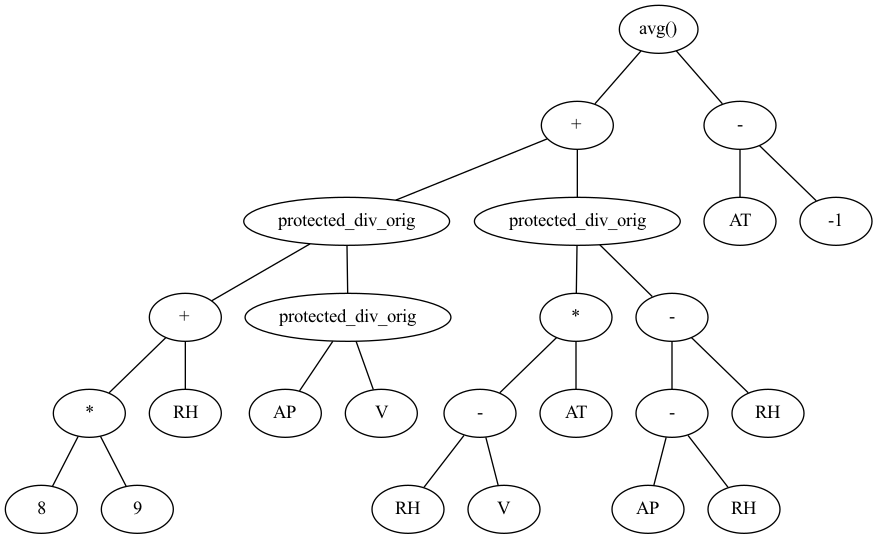

In [87]:
 # show the above image here for convenience
from IPython.display import Image
Image(filename='data/numerical_expression_tree.png')

## 4.2 Measure Performance

Earlier, we split our data into train and test chunks. 

GEPPY never saw your holdout dataset that we prepared, so let's apply our model to the holdout, and confirm how well it did.

### 4.2.1 Convert the Model into an Executable Function

In [88]:
##### broken - this doesn't work if there are protected divides we've "simplified" to make them readable... argh.
# leaving in as an illustration, but don't use it, use the corrected code below
def CalculateBestModelOutput(testdata, model):
    
    # ensure our data is a pandas data frame
    # I think this is not working, it's lost our protected divide... 
    ourdataframe = pd.DataFrame(testdata)
    ourdataframe = ourdataframe.reset_index()  
    ourdataframe.eval('Yp = ' + model, inplace = True)  
    ourdataframe.Yp.replace(np.inf, np.nan)
    ourdataframe.Yp.replace(np.NINF, np.nan)
    
    return ourdataframe.Yp.to_numpy(dtype=float)


In [89]:
##### fixed - this works, and applis the actual function generated, with scaling option.
# accepts a pandas array, a list of data input Terminals, your best individual, and option to turn off linear scaling.

def CalculateGeppyModelOutput(testdata, finalTerminals, best_ind, enable_ls=true):
    
    # compile the best individual to a function
    finalfunc = toolbox.compile(best_ind)
    
    # Build a numpy arrays from pandas, with good tmp names 
    paramlist = []
    for term in finalTerminals:
        locals()["_holdout" + str(term)] = testdata[term].values
        paramlist = paramlist + ["_holdout" + str(term)]

    # use the tmp arrays names to complete the params part of the evaluation call
    ourparam_string = ", ".join(paramlist)
    ourfuncstring = 'np.array(list(map(finalfunc, ' + ourparam_string + ')))'
    
    # run the outputs over the data, and return the numpy array
    # this runs our core "discovered" geppy function, but doesn't include our linear scaling
    rawoutput = eval(ourfuncstring)
    
    # define a function to apply our linear scaling
    def lscaler(x, a=best_ind.a, b=best_ind.b):
        return a * x + b
    # build command to evaluate scaling
    correctionstring = 'np.array(list(map(lscaler, rawoutput)))'
    
    if enable_ls:
        # apply and return the linear scaled output
        return eval(correctionstring)
    else:
        return rawoutput   


### 4.2.2 Apply the model to holdout data

note it is also applied to the training data, so we have both to compare against, to check for overfitting

In [90]:
# make our recieved holdout and training data targets global numpy arrays
for term in finalTarget:
    print('### for the target,', term + ':')
    globals()['holdout_Yt'] = holdout[term].values
    print('setting ', 'holdout_Yt')
    globals()['train_Y'] = train[term].values
    print('setting ', 'train_Yt')
    

### for the target, PE:
setting  holdout_Yt
setting  train_Yt


In [91]:
# apply best model to holdout data

# correct this to work for TryFeaturesOnly
if TryFeaturesOnly == 0:
    holdout_Yp = CalculateGeppyModelOutput(holdout, finalTerminals, best_ind)
else:
    holdout_Yp = CalculateGeppyModelOutput(holdout, ZscoreTerminals, best_ind)

In [92]:
# apply best model to training data
# correct this to work for TryFeaturesOnly

if TryFeaturesOnly == 0:
    train_Yp = CalculateGeppyModelOutput(train, finalTerminals, best_ind)
else:
    train_Yp = CalculateGeppyModelOutput(train, ZscoreTerminals, best_ind)

### 4.2.3 Calculate <span style="color:blue">MSE</span>  and <span style="color:blue">R2</span> for holdout data

In [93]:
def colorful(r, g, b, text):
    return "\033[38;2;{};{};{}m{} \033[38;2;255;255;255m".format(r, g, b, text)

In [94]:
from sklearn.metrics import mean_squared_error, r2_score

holdout_mse = mean_squared_error(holdout_Yt, holdout_Yp)
holdout_r2 = r2_score(holdout_Yt, holdout_Yp)

In [95]:
# print out our final performance scores. make it standout in pink!
head = "\n###################################################"
mse_text = "      Mean squared error: %.2f" % holdout_mse
r2_text  = "      R2 score : %.2f" % holdout_r2

print(colorful(0,50,255,head))
print(colorful(0,50,255," Performance on our holdout dataset is as follows:\n"))
print(colorful(255,0,255,mse_text))
print(colorful(255,0,255,r2_text))
print(colorful(0,50,255,head))

# log
experiment['Holdout Mean squared error']= str(holdout_mse)
experiment['Holdout R2 score']= str(holdout_r2)


################################################### 
 Performance on our holdout dataset is as follows:
 
      Mean squared error: 19.63 
      R2 score : 0.93 

################################################### 


### 4.2.4 Quick study of the holdout errors

In [96]:
# quick study of the errors. (Tells us the typcial plus/minus we could expect on predicting target variable for new data.)

holdout_prediction_errors = pd.DataFrame(holdout_Yp.squeeze() - holdout_Yt, columns = ['Holdout Absolute Prediction Error'])
holdout_prediction_errors.describe()

,Holdout Absolute Prediction Error
count,4687.000000
mean,0.091566
std,4.430411
min,-18.168781
25%,-3.067160
50%,0.184622
75%,3.093024
max,44.549000


## 4.3 Visualisation of Model Performance

### 4.3.1. Plot actual vs prediction

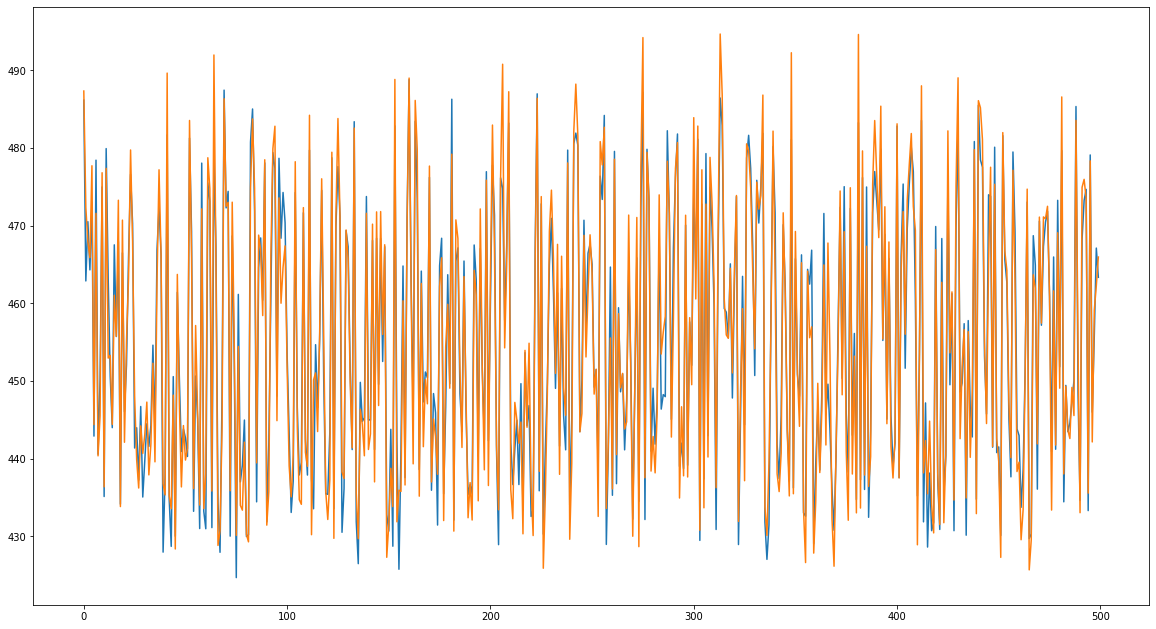

In [97]:
from matplotlib import pyplot

startrow = len(holdout_Yp)-500
endrow = len(holdout_Yp)

pyplot.rcParams['figure.figsize'] = [20, 11]
pyplot.plot(holdout_Yp[startrow:endrow])      # predictions are in blue
pyplot.plot(holdout_Yt[startrow:endrow])      # actual values are in orange
pyplot.show()

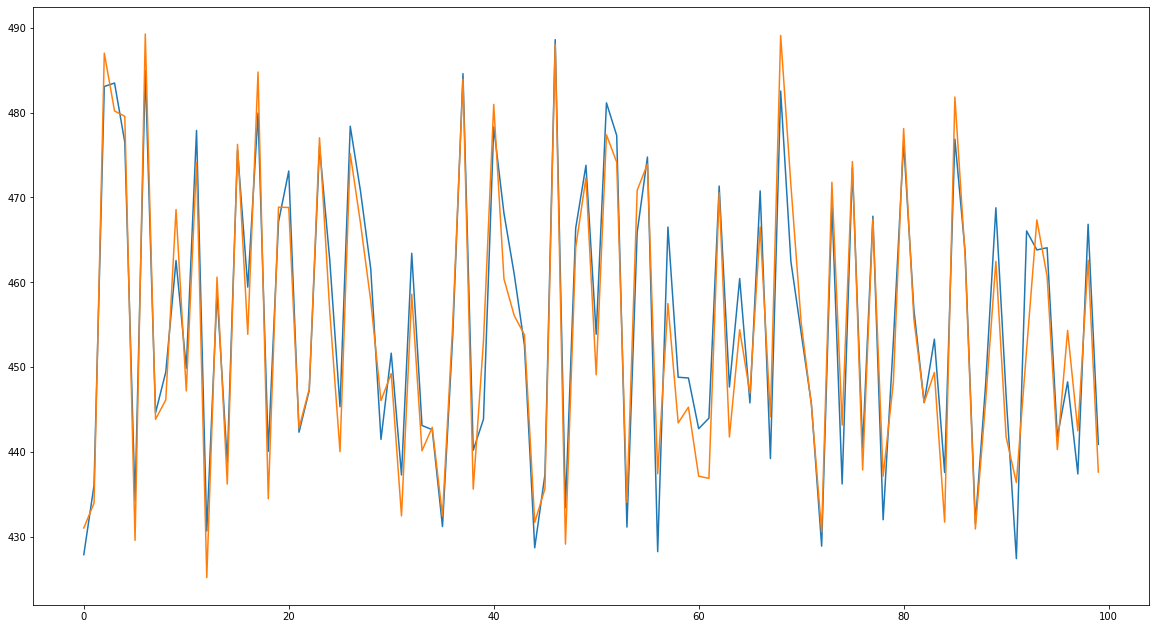

In [98]:
from matplotlib import pyplot

# zoom in by setting your start/end range here
startrow = 100
endrow = 200

pyplot.rcParams['figure.figsize'] = [20, 11]
pyplot.plot(holdout_Yp[startrow:endrow])      # predictions are in blue
pyplot.plot(holdout_Yt[startrow:endrow])      # actual values are in orange
pyplot.show()

### 4.3.1. Histogram of Prediction Errors on the holdout

In [99]:
# set your histogram bin size here
numBins = 50

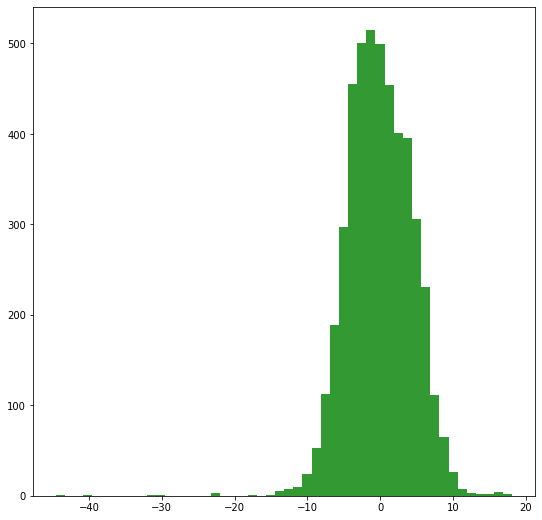

In [100]:
pyplot.rcParams['figure.figsize'] = [9, 9]
hfig = pyplot.figure()
ax = hfig.add_subplot(111)
ax.hist( holdout_Yt - holdout_Yp, numBins,color='green',alpha=0.8)
pyplot.show()

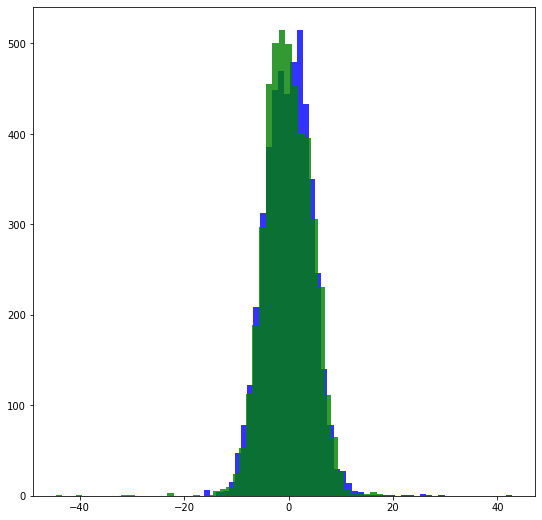

In [101]:
# Lets look at overfitting - to see if there is a big difference between train, and holdout
pyplot.rcParams['figure.figsize'] = [9, 9]
hfig = pyplot.figure()
ax = hfig.add_subplot(111)

ax.hist(train_Yp - train_Y,numBins,color='blue',alpha=0.8)     # blue: the errors seen in training data
ax.hist(holdout_Yt-holdout_Yp,numBins,color='green',alpha=0.8) # green: the errors seen in holdout data
pyplot.show()

# training vs holdout errors: do we see overfitting going on? 
# we can tell if the errors on holdout are very wide compared to narrow ones in training
# plus, the "shape" should be similar, with green values squashed reflecting test/train split.

# blue is training errors
# green is holdout errors

### Record your findings

Throughout this notebook, we saved run details to a dictionary called experiment.

We can now save this to a file, to help to recreate the results if needed, as well as to compare results across many runs and or datasets.

In [102]:
import json
print(json.dumps(experiment, sort_keys=False, indent=4))

{
    "date": "2022/07/11",
    "seed": "10",
    "absolute data path": "/Users/andrew.morgan/dev/clone/geppy/examples/sr/../../data/",
    "relative path": "../../data/",
    "test/holdout split": "0.5",
    "normalisation": "False",
    "TryKmeansFeatures": "False",
    "TryFeaturesOnly": "False",
    "Original Data Inputs": [
        "AT",
        "V",
        "AP",
        "RH"
    ],
    "final terminal inputs": [
        "AT",
        "V",
        "AP",
        "RH"
    ],
    "number of genes": "2",
    "length of rnc array": "10",
    "use linear scaling": "True",
    "linker function": "avgval",
    "tournament size": "20",
    "population size": "286",
    "number of elites": "5",
    "number of generations": "50",
    "Holdout Mean squared error": "19.63273850304514",
    "Holdout R2 score": "0.9319544491889822"
}


In [103]:
# add you code here to save your experimental design and results data to wherever is best for you:


# 5.0 Deployment

### Is it worth implementing the answer?
Deploying ML solutions to production can often be expensive. Doing nothing is invariably the alternative to a spending money delivering ML produced models into production. It implies a "business case" question we should answer when we conclude the study:
If the business people selling the power plant outputs resorted to a common impulse to use the "average output" of the plant over the time period to be the "estimate" of plant output (I call this the worst practical predictor) - what would this very low cost alternative look like? How would using Machine Learning improve the business over and above what they would see as the cheapest strategy?
#### How bad is the simple estimate, versus our found solution?
Let's examine the histogram of errors of the alternative "do nothing" approach to estimation, using the worst predictor, an average.

### Simple averages are not great
The simple average approach gives us a plus/minus 40 on the value, which is not bell curve shaped, meaning the business will feel the estimates are generally poor most of the time.
In contrast, our symbolic regression gives us a nice bell curve shaped estimate, that is plus/minus 14 on a particularly bad day, and otherwise plus/minus 8 ... so a far far better estimate.



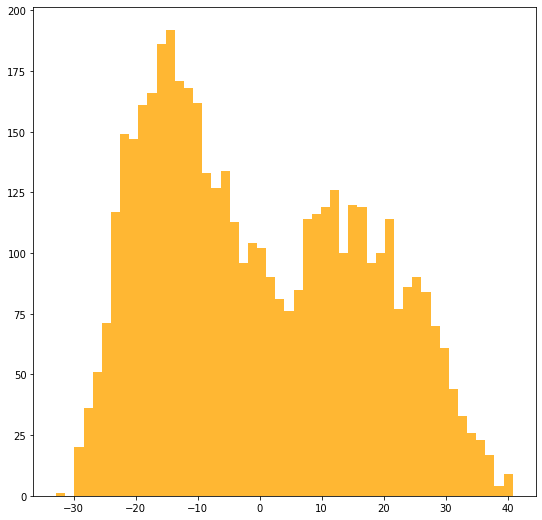

In [104]:
# plot the WORST predictor's errors, which is the simple average of target values in training data.

pyplot.rcParams['figure.figsize'] = [9, 9]
hfig2 = pyplot.figure()
ax = hfig2.add_subplot(111)
ax.hist(holdout_Yt-holdout_Yt.mean(),numBins,color='orange',alpha=0.8)
pyplot.show()

## 5.1 Business Value Assessment
Let's compare the cheapest solution (using average value) against our solution, having roughly similar cost

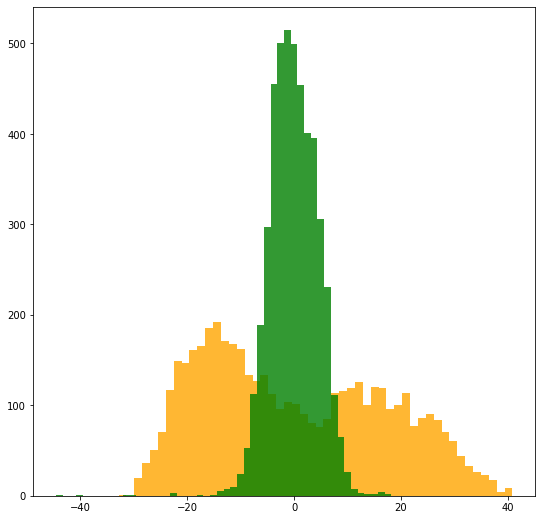

In [105]:
pyplot.rcParams['figure.figsize'] = [9, 9]
hfig3 = pyplot.figure()
ax = hfig3.add_subplot(111)
ax.hist(holdout_Yt-holdout_Yt.mean(),numBins,color='orange',alpha=0.8)  # green: errors using the average value as predictor
ax.hist(holdout_Yt-holdout_Yp,numBins,color='green',alpha=0.8)          # orange: errors using our model
pyplot.show()

# we should see our model in green really tightening up on the predictions (narrow histogram) vs the average-as-predictor
# this also helps to explain the benefit of the model in terms of improved plus/minus prediction

# green = our model
# orange = worst predictor

## 5.2 Next Steps: Implementation
The implementation cost of getting our symbolic regression based estimator into production is very very low as a general rule of thumb. 

This is because the regression equation can be quickly re-written into any target system or programming language imaginable very quickly. The complete model portability of the equations produced are a huge benefit of the method.

In the power plant for example, they could simply add this equation into the spreadsheet where they are maintaining the raw data to get this benefit. 


# 6.0 Credits and Licence

License:  **MIT**

Date:     **June 25th, 2022**

Author:   **Andrew Morgan**

About the Author:

Andrew is a 25 year veteran in data engineering and data science. He currently works as the Director of Data at **6point6** and is based in the UK. He is also the author of **Mastering Spark for Data Science**) found here https://www.amazon.co.uk/Mastering-Spark-Science-Andrew-Morgan/dp/1785882147.

Credits:
This software uses Geppy, Deap, and other opensource packages, and kudos and a big shout out goes out to all of their authors for publishing thier amazing software.